In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
parent_directory = os.path.dirname(cwd)
sys.path.append(parent_directory+ "/"+"src")


TypeError: expected str, bytes or os.PathLike object, not list

NameError: name 'parent' is not defined

/home/jpdef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6


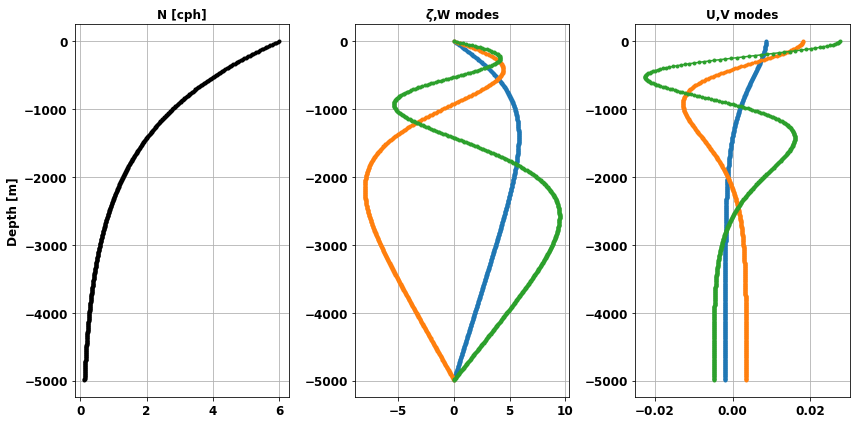

In [ ]:
from ModeSolver import InternalWaveModes

#Plot some modes using the ModeSolver
tocph = (2*np.pi)/3600  # scalar to convert between cycles per hour [cph] to rad/s
omega = (1/12) * tocph
depth_axis   = np.arange(0,5000,10); No = 6; Zo = 1300
stratification_function = lambda z : ( No*np.exp( -z/Zo )*tocph )**2


IWM = InternalWaveModes(stratification_function(depth_axis),
                        depth_axis,omega,
                        num_modes=10,
                        puvmodes=True,
                        free_surface=False)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.plot(np.sqrt(stratification_function(depth_axis))/tocph,-depth_axis,'k.-')
plt.ylabel('Depth [m]')
plt.title('N [cph]')
plt.grid()

plt.subplot(132)
for i in range(3):
    plt.plot(IWM.modes[:,i],-depth_axis,'.-')
plt.title('$\zeta$,W modes')
plt.grid()

plt.subplot(133)
for i in range(3):
    plt.plot(IWM.dzmodes[:,i],-depth_axis,'.-')
plt.title('U,V modes')
plt.grid()

plt.tight_layout()


In [45]:
#Now compute a bunch of internal wave modes for a set of frequencies
omegas = np.arange(0.05, 5.0, 0.1)
num_modes = 50
IWM_LIST = []
for i,o in enumerate(omegas):
    IWM_LIST.append( InternalWaveModes(stratification_function(depth_axis),
                            depth_axis,o*tocph,
                            num_modes=num_modes,
                            puvmodes=True,
                            free_surface=False) )

Text(0.5, 0, 'Wavenumber [cpkm]')

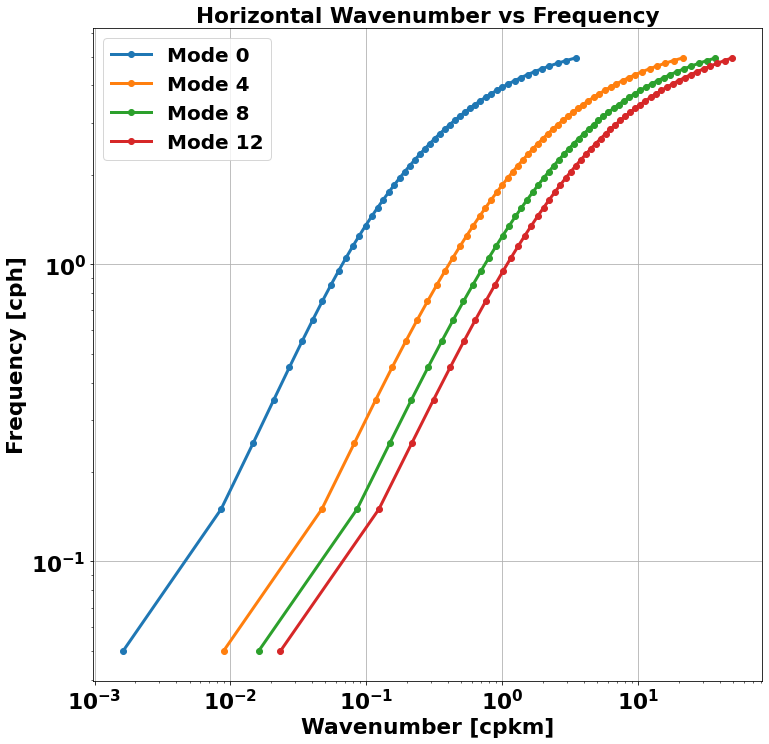

In [ ]:
#Plot the horizontal wave numbers as a function of frequency for each mode
tocpkm = 1000/(2*np.pi)
horizontal_wavenumbers = np.zeros( shape=(len(omegas),num_modes) )
for i in range(len(IWM_LIST)):
    horizontal_wavenumbers[i,:len(IWM_LIST[i].hwavenumbers)] = IWM_LIST[i].hwavenumbers

fig= plt.figure(figsize=(12,12))
plt.title('Horizontal Wavenumber vs Frequency')
for m in np.arange(0,16,4):
    plt.loglog(horizontal_wavenumbers[:,m]*tocpkm,omegas,'o-',label='Mode %d' % m,lw=3)
plt.grid()
plt.legend(fontsize=20)
plt.ylabel('Frequency [cph]')
plt.xlabel('Wavenumber [cpkm]')

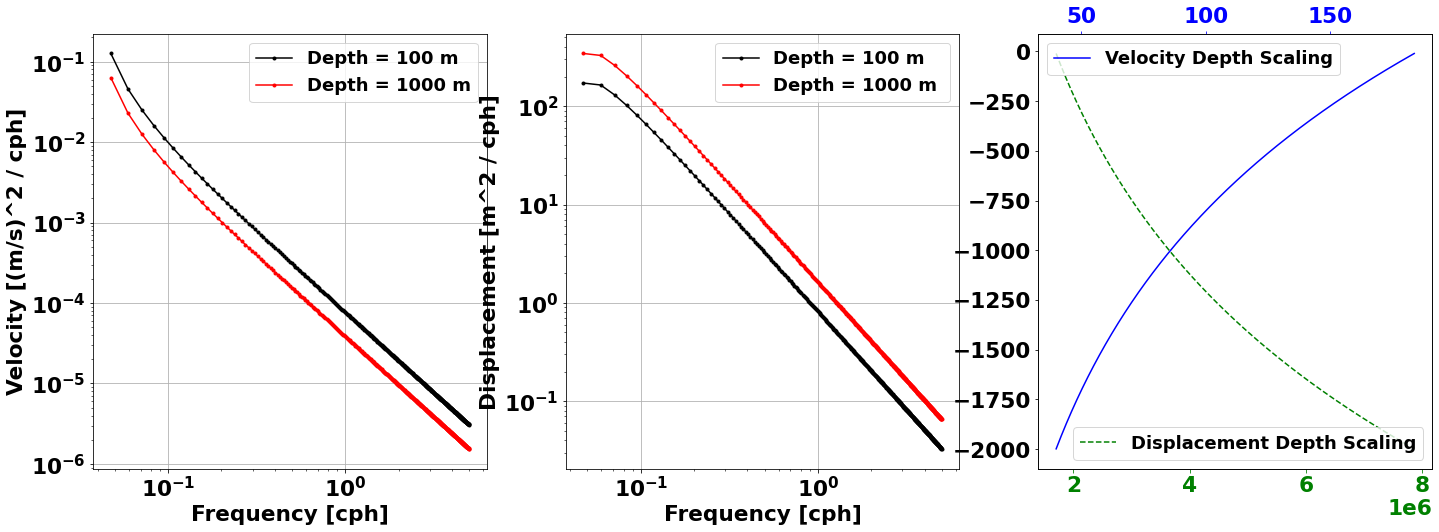

In [92]:
import SpectralDensityModel as SDM

#Build spectrum model
gm81 = SDM.GM81Params()
gm81.No = 6*tocph
gmsm = SDM.GarrettMunkSpectralModel(gm81)
df = gmsm.f + 1e-5
omegas = np.arange(df,5*tocph,df/4)
depths = np.arange(10,2000,1)

plt.figure(figsize=(24,8))
plt.subplot(131)
plt.loglog(omegas/tocph,tocph*gmsm.PSD_VELO(100,omegas,mode=1),'k.-',label="Depth = %d m" % 100)
plt.loglog(omegas/tocph,tocph*gmsm.PSD_VELO(1000,omegas,mode=1),'r.-',label="Depth = %d m" % 1000)
plt.legend()
plt.grid()
plt.xlabel('Frequency [cph]')
plt.ylabel('Velocity [(m/s)^2 / cph]')

plt.subplot(132)
plt.loglog(omegas/tocph,tocph*gmsm.PSD_ZETA(100,omegas,mode=1),'k.-',label="Depth = %d m " % 100)
plt.loglog(omegas/tocph,tocph*gmsm.PSD_ZETA(1000,omegas,mode=1),'r.-',label="Depth = %d m " % 1000)
plt.legend()
plt.xlabel('Frequency [cph]')
plt.ylabel('Displacement [m^2 / cph]')
plt.grid()


plt.subplot(133)
depth_scaling_displacement = gmsm.b**2 * (gmsm.No/gmsm.N(depths))
depth_scaling_velocity = gmsm.b**2 * gmsm.No*(gmsm.N(depths))
plt.plot( depth_scaling_displacement, -depths,'g--', label="Displacement Depth Scaling")
plt.gca().tick_params(axis='x',colors='green')
plt.legend(loc=4)
axt = plt.twiny()
axt.plot( depth_scaling_velocity, -depths, 'b-', label='Velocity Depth Scaling')
plt.gca().tick_params(axis='x',colors='blue')
plt.legend()
plt.show()


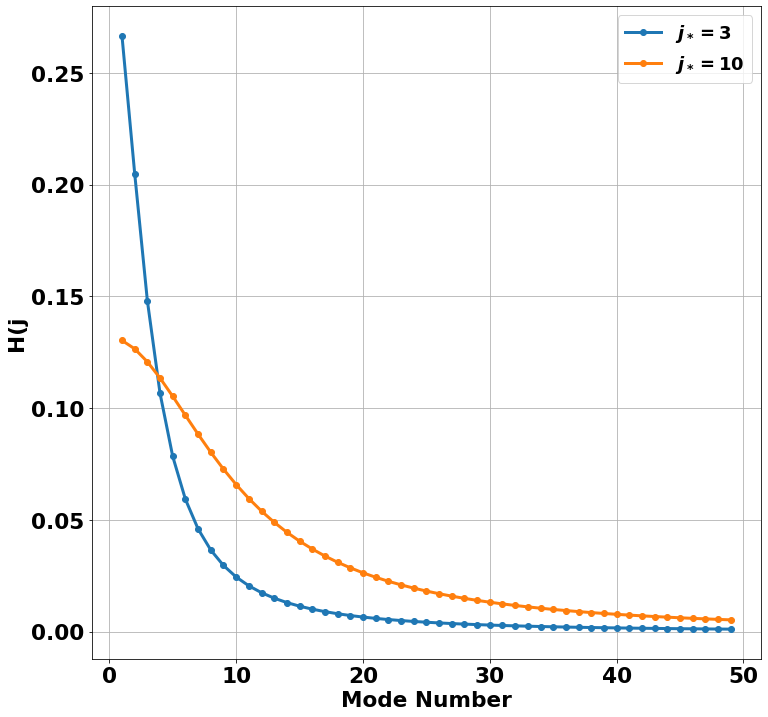

In [ ]:
modes = np.arange(1,50,1)
fig = plt.figure(figsize=(12,12))
plt.plot(modes,[gmsm.H(mode) for mode in modes],'o-',label="$j_*=3$",lw=3)
gmsm.jstar = 10
plt.plot(modes,[gmsm.H(mode) for mode in modes],'o-',label="$j_*=10$",lw=3)
plt.legend()
plt.ylabel('H(j)')
plt.xlabel('Mode Number')
plt.grid()
gmsm.jstar = 3 

3